<a href="https://colab.research.google.com/github/JuanEscala/Semaforo/blob/main/Hashing_e_%C3%8Dndices_Invertidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Cuaderno de la Unidad: Hashing e Índices Invertidos
### Introducción: Del Hashing a la Búsqueda Eficiente
Este cuaderno explora cómo los principios del Método de Dispersión (Hashing) se aplican a los datos no estructurados (texto) para crear el Índice Invertido, la estructura que permite a los motores de búsqueda encontrar información instantáneamente.

El Índice Invertido es una estructura de datos que asigna contenido (palabras) a sus ubicaciones en un conjunto de documentos. Es similar a un mapa hash que dirige desde una palabra a su documento o página web.
https://www.geeksforgeeks.org/dbms/inverted-index/

###⚙️ Módulo 1: Configuración Inicial y Datos
Esta sección carga las bibliotecas necesarias y define los documentos de prueba.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from typing import Dict, List, Tuple, Any

# Definir los documentos de ejemplo
DOCUMENTOS_EJEMPLO = {
    "Doc 1": "El veloz zorro marrón saltó sobre el perro perezoso.",
    "Doc 2": "El perro perezoso durmió al sol.",
    "Doc 3": "Este artículo se basa en un índice invertido.",
    "Doc 4": "El índice invertido es una estructura de datos que asigna contenido (palabras) a sus ubicaciones en un conjunto de documentos."
}

## Configuracion inicial
### Descargamos los paquetes necesarios de NLTK para tokenizar y ver palabras vacias

In [ ]:
try:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('punkt_tab')
    print("Paquetes NLTK descargados con éxito.")
except Exception as e:
    print(f"Error al descargar NLTK: {e}")

Paquetes NLTK descargados con éxito.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 🛠️ Módulo 2: Preprocesamiento Lingüístico (Normalización de la Clave)
Esta fase transforma el texto bruto en las claves estandarizadas que usaremos en el mapa hash (el índice).

1. Tokenización
La Tokenización divide el texto en unidades individuales (tokens o palabras).

2. Normalización (Stop Words y Minúsculas)
La Normalización elimina las palabras vacías (stop words) (como "el", "la", "un") y convierte todo a minúsculas, asegurando que la clave de búsqueda sea única y eficiente.

In [ ]:
def preprocess_document(doc_id: str, text: str) -> List[Tuple[str, int, str]]:
    """Tokeniza, limpia y mantiene el rastro de la posición original."""

    tokens = word_tokenize(text, language='spanish')
    palabras_vacias = set(stopwords.words('spanish'))

    clean_tokens_with_pos = []

    # Recorremos los tokens para limpiar y obtener la posición
    for i, word in enumerate(tokens):
        word_lower = word.lower()

        # Filtramos si es alfabético y no es palabra vacía
        if word_lower.isalpha() and word_lower not in palabras_vacias:
            # Almacenamos (palabra, posición_en_token, DocID)
            clean_tokens_with_pos.append((word_lower, i, doc_id))

    return clean_tokens_with_pos

# Aplicar a los documentos de ejemplo
processed_data = {}
for doc_id, text in DOCUMENTOS_EJEMPLO.items():
    processed_data[doc_id] = preprocess_document(doc_id, text)

print("Datos procesados (ejemplo de un token limpio):")
print(processed_data['Doc 1'][:4])




Datos procesados (ejemplo de un token limpio):
[('veloz', 1, 'Doc 1'), ('zorro', 2, 'Doc 1'), ('marrón', 3, 'Doc 1'), ('saltó', 4, 'Doc 1')]


## 📊 Módulo 3: Construcción del Índice Invertido (Aplicación Hash)
El Índice Invertido es un Mapa Hash donde la clave es el término (token limpio) y el valor es la lista de publicaciones (punteros).

1. Índice a Nivel de Registro (Registro/Documento)
Este índice solo almacena una lista de referencias a documentos para cada palabra.

2. Índice a Nivel de Palabra (Posición/Offset)
Este índice también almacena la posición de cada palabra dentro del documento, ofreciendo mayor funcionalidad (como la búsqueda de frases o proximidad).

In [ ]:
def build_inverted_index(processed_data: Dict[str, List[Tuple[str, int, str]]]) -> Dict[str, List[Tuple[str, int]]]:
    """
    Construye el índice invertido a Nivel de Palabra (Word-Level).
    Clave (Término) -> Valor [Lista de (DocID, Posición)]
    """
    inverted_index: Dict[str, List[Tuple[str, int]]] = {}

    for doc_id, tokens in processed_data.items():
        for word, pos, _ in tokens:
            # El término es la clave de nuestro Mapa Hash
            if word not in inverted_index:
                inverted_index[word] = []

            # El valor es la lista de punteros (DocID y Posición)
            inverted_index[word].append((doc_id, pos))

    return inverted_index

# Construir el índice
INDEX = build_inverted_index(processed_data)

print("\n--- ÍNDICE INVERTIDO FINAL (APLICACIÓN HASHING) ---")
print("El tiempo de acceso a cualquier 'Término' es O(1) en promedio.")
print("-" * 60)

# Visualizar la estructura para las 5 palabras más comunes
all_words = [token[0] for tokens in processed_data.values() for token in tokens]
frecuencia_total = FreqDist(all_words)
top_words_for_display = frecuencia_total.most_common(5)

for word, count in top_words_for_display:
    pointers = INDEX.get(word, [])
    # Mostramos las ubicaciones como punteros
    print(f"CLAVE: '{word}' ({count}x)")
    print(f"  PUNTEROS (Ubicaciones): {pointers[:3]}...") # Mostramos solo 3 punteros
    print("-" * 60)


--- ÍNDICE INVERTIDO FINAL (APLICACIÓN HASHING) ---
El tiempo de acceso a cualquier 'Término' es O(1) en promedio.
------------------------------------------------------------
CLAVE: 'perro' (2x)
  PUNTEROS (Ubicaciones): [('Doc 1', 7), ('Doc 2', 1)]...
------------------------------------------------------------
CLAVE: 'perezoso' (2x)
  PUNTEROS (Ubicaciones): [('Doc 1', 8), ('Doc 2', 2)]...
------------------------------------------------------------
CLAVE: 'índice' (2x)
  PUNTEROS (Ubicaciones): [('Doc 3', 6), ('Doc 4', 1)]...
------------------------------------------------------------
CLAVE: 'invertido' (2x)
  PUNTEROS (Ubicaciones): [('Doc 3', 7), ('Doc 4', 2)]...
------------------------------------------------------------
CLAVE: 'veloz' (1x)
  PUNTEROS (Ubicaciones): [('Doc 1', 1)]...
------------------------------------------------------------


## ☁️ Módulo 4: Visualización de Importancia
La frecuencia de una clave en el índice puede indicar su importancia.

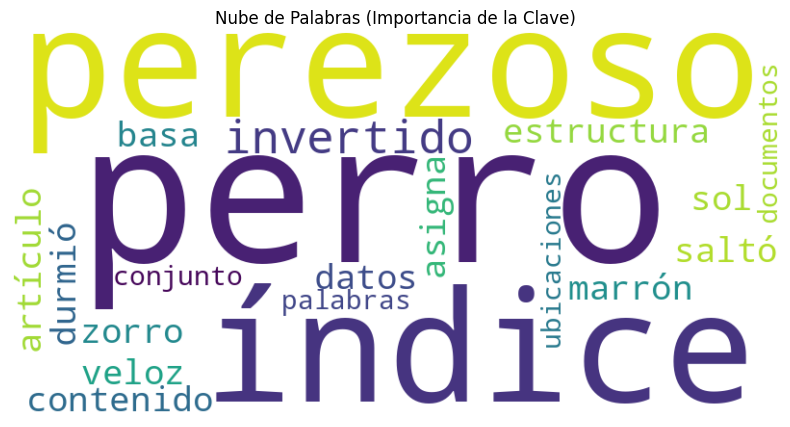

In [ ]:
# Recopilar todas las palabras limpias para la nube
all_clean_words = [token[0] for tokens in processed_data.values() for token in tokens]
frecuencia_final = FreqDist(all_clean_words)

# Crear gráfico de nube de palabras wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_final)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras (Importancia de la Clave)')
plt.axis('off')
plt.show()

## 🔍 Conclusión: La Búsqueda con $O(1)$

La estructura de Índice Invertido nos permite ir directamente a la lista de punteros asociados a la clave (Ej. 'invertido'), en lugar de leer secuencialmente los 100 documentos.

## 🚀 Módulo Introductorio Adicional: La Necesidad del PLN
1. El Desafío del Acceso al Texto
El objetivo de la Organización de Archivos es transformar datos para el acceso rápido. A diferencia de un ID numérico (h(x) = x % M), el texto es ambiguo y no estructurado, lo que hace que la búsqueda eficiente sea inviable sin pre-procesamiento.

Problema de la Ambigüedad: Un motor de búsqueda no puede tratar "Zorros," "zorro," y "ZORRO" como tres claves distintas si queremos encontrar un documento sobre zorros.

Problema de la Ineficiencia: Palabras comunes (como "el" o "un") aparecen en casi todos los documentos, contaminando el índice y obligando a un sistema a revisar demasiados archivos.

## 🔍 Paso Cero: Demostrando el Problema de las Stop Words
Antes de limpiar, mostraremos las palabras que la librería NLTK considera "inútiles" para la búsqueda. Estas son las palabras que no deberían ser claves en nuestro Índice Invertido.

In [ ]:
# Muestra las palabras que el algoritmo considera "ruido"
print("--- Palabras Vacías (Stop Words) que serán filtradas ---")
palabras_vacias_es = set(stopwords.words('spanish'))
print(list(palabras_vacias_es)[:20])
print("\nNota: Estas palabras no son útiles como claves de índice.")

--- Palabras Vacías (Stop Words) que serán filtradas ---
['habíais', 'nos', 'antes', 'mía', 'los', 'tuvimos', 'estuvieses', 'mi', 'estaríamos', 'esos', 'tuvieseis', 'tú', 'estaremos', 'hemos', 'ellas', 'hubieras', 'de', 'serían', 'tengas', 'hubiésemos']

Nota: Estas palabras no son útiles como claves de índice.


## 🎯 Conexión Clave: Tokenización es la División de la Clave
La Tokenización es el primer paso de organización. En el contexto de Hashing:

Hashing: Dividimos la dirección de memoria (x) en un índice.

Tokenización: Dividimos el documento en sus componentes de índice (tokens).

Este paso transforma el flujo continuo de texto en una lista discreta de elementos sobre los cuales podemos aplicar las reglas de hashing y normalización.

In [ ]:
texto_muestra = "La Inteligencia Artificial (IA) investiga cómo construir programas."
tokens_muestra = word_tokenize(texto_muestra, language='spanish')

print("--- Demostración de Tokenización ---")
print(f"Texto Original: '{texto_muestra}'")
print(f"Tokens (Unidades de Índice): {tokens_muestra}")
print("\nResultado: El documento, que era un solo string, ahora es una lista de elementos (tokens) listos para ser procesados y almacenados en el índice.")

--- Demostración de Tokenización ---
Texto Original: 'La Inteligencia Artificial (IA) investiga cómo construir programas.'
Tokens (Unidades de Índice): ['La', 'Inteligencia', 'Artificial', '(', 'IA', ')', 'investiga', 'cómo', 'construir', 'programas', '.']

Resultado: El documento, que era un solo string, ahora es una lista de elementos (tokens) listos para ser procesados y almacenados en el índice.


In [ ]:
def procesar_texto(texto):
  print('---1. Texto original ---')
  print(texto)

  #A. Tokenizacion: Dividir el texto en palabras individuales
  print('---2. Tokenizacion ---')
  tokens = word_tokenize(texto,language='spanish')
  print(tokens)

  #B. Normalizacion y limpieza
  #Obtenemos las stop words en español (el, la, los, y, de...)
  palabras_vacias = set(stopwords.words('spanish'))

  tokens_limpios = []
  for word in tokens:
    #Convertir a minusculas para que sea iguales
    word = word.lower()
    #Filtrar: si es alfanumerico y no esta en la lista de palabras vacias
    if word.isalpha() and word not in palabras_vacias:
      tokens_limpios.append(word)
  print('---3. Tokens limpios sin conectores ni puntuacion ---')
  print(tokens_limpios)

  #Análisis de Frecuencia
  frecuencia = FreqDist(tokens_limpios)

  print('---4. Frecuencia de palabras ---')
  print(frecuencia.most_common(5))

  #Crear grafico de nube de palabras wordcloud
  from wordcloud import WordCloud
  import matplotlib.pyplot as plt
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

---1. Texto original ---
El Procesamiento del Lenguaje Natural (NLP), o Procesamiento del lenguaje natural, es un área de aplicación destacada para la programación declarativa, específicamente la programación lógica. La Inteligencia Artificial (IA), de la cual forma parte el NLP, investiga cómo construir programas que realicen tareas asociadas con la inteligencia humana, como la comprensión del lenguaje natural.
El papel de la lógica de predicados y la programación lógica en el NLP se centra en la Representación del Conocimiento, donde el desafío principal es la traducción sistemática del conocimiento expresado en lenguaje natural al lenguaje formal.
A continuación, se detalla la relación entre la representación del conocimiento, el lenguaje natural y el formalismo lógico:
La Traducción del Lenguaje Natural al Lenguaje Formal
El conocimiento sobre un dominio generalmente se expresa en un lenguaje natural (como el castellano o el inglés). Por lo tanto, el problema de representar este co

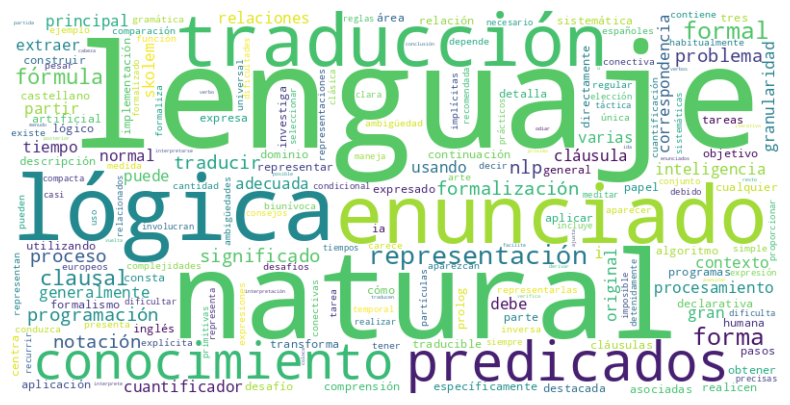

In [ ]:
texto_ejemplo = """El Procesamiento del Lenguaje Natural (NLP), o Procesamiento del lenguaje natural, es un área de aplicación destacada para la programación declarativa, específicamente la programación lógica. La Inteligencia Artificial (IA), de la cual forma parte el NLP, investiga cómo construir programas que realicen tareas asociadas con la inteligencia humana, como la comprensión del lenguaje natural.
El papel de la lógica de predicados y la programación lógica en el NLP se centra en la Representación del Conocimiento, donde el desafío principal es la traducción sistemática del conocimiento expresado en lenguaje natural al lenguaje formal.
A continuación, se detalla la relación entre la representación del conocimiento, el lenguaje natural y el formalismo lógico:
La Traducción del Lenguaje Natural al Lenguaje Formal
El conocimiento sobre un dominio generalmente se expresa en un lenguaje natural (como el castellano o el inglés). Por lo tanto, el problema de representar este conocimiento utilizando el lenguaje de la lógica de predicados se transforma en un problema de traducción.
El objetivo de la traducción es extraer, a partir de una descripción del problema en lenguaje natural, una representación en la notación clausal de la lógica de predicados que sea directamente traducible a una implementación en el lenguaje Prolog.
El proceso general para traducir cualquier enunciado a la forma clausal consta de tres pasos:
1. Traducir el enunciado a una fórmula de la lógica de predicados.
2. Aplicar el Algoritmo 3 para obtener una forma normal de Skolem.
3. Extraer las cláusulas de la forma normal de Skolem y representarlas en notación clausal.
Desafíos en la Formalización
La tarea de traducir el lenguaje natural al lenguaje formal es, en gran medida, un arte, ya que el lenguaje natural presenta varias complejidades en comparación con el lenguaje formal.
1. Ambigüedad y Contexto: El lenguaje natural carece de una gramática simple y regular. El significado de sus expresiones depende del contexto y contiene una gran cantidad de ambigüedades.
2. Correspondencia Inversa No Biunívoca: No existe una función de correspondencia que conduzca a una única fórmula del lenguaje formal a partir de un enunciado de lenguaje natural; es decir, un enunciado puede tener varias representaciones.
3. Cuantificación y Conectivas Implícitas: Una conectiva o un cuantificador pueden aparecer en una formalización lógica a pesar de que las partículas que habitualmente los representan no aparezcan de forma explícita en el enunciado en lenguaje natural. Por ejemplo, el enunciado "Los españoles son europeos" se formaliza usando el cuantificador universal y el condicional.
4. Tiempo y Causa-Efecto: La lógica de predicados clásica no maneja el uso del tiempo. Esto dificulta la expresión adecuada y compacta de relaciones de causa-efecto que involucran tiempos relacionados, para lo cual sería necesario recurrir a una lógica temporal.
5. Granularidad: La elección del conjunto de primitivas (la granularidad) con el que se representa el conocimiento no siempre es clara y puede dificultar la representación.
Debido a estas dificultades, es casi imposible proporcionar reglas precisas y sistemáticas para la traducción del lenguaje natural al lenguaje formalizado de la lógica de predicados.
Consejos Prácticos para la Traducción
La táctica recomendada para realizar la traducción y formalización incluye:
• Meditar detenidamente sobre el sentido del enunciado del lenguaje natural.
• Seleccionar una interpretación de partida (I) que sea adecuada y facilite la posterior representación del enunciado.
• Derivar una fórmula que, cuando se interprete usando I, tenga un significado lo más próximo posible al enunciado original.
Este proceso de traducción es iterativo, un proceso de "ida y vuelta" en el que se verifica que el significado de la fórmula lógica se ajusta al enunciado original al interpretarse.
En la notación clausal, los verbos de los enunciados del lenguaje natural (como "asesinar" u "odiar") generalmente se traducen como predicados y relaciones. El verbo principal a menudo se coloca como conclusión (la cabeza de una cláusula) y el resto de predicados en la condición (el cuerpo de la cláusula).
Al igual que un traductor humano debe comprender el idioma de origen para asegurar una traducción fiel, un sistema de representación de conocimiento debe interpretar cuidadosamente el lenguaje natural para formalizar los hechos en símbolos manipulables"""
procesar_texto(texto_ejemplo)

In [ ]:
# Instalación de spaCy y descarga del modelo en español (Small)
!pip install -U spacy
!python -m spacy download es_core_news_sm

import spacy
# Cargar el modelo de lenguaje
nlp = spacy.load("es_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 40.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 🧬 Módulo 5: Lematización (Reducción del Espacio de Claves)
En Organización de Archivos, queremos que nuestro índice sea compacto. Si indexamos "gato" y "gatos" por separado, duplicamos punteros innecesariamente. La Lematización reduce las palabras a su raíz, optimizando el almacenamiento.

In [ ]:
def preprocess_spacy(doc_id: str, text: str) -> List[Tuple[str, int, str]]:
    """
    Utiliza spaCy para lematizar.
    Transforma 'corriendo' -> 'correr', reduciendo el tamaño del diccionario.
    """
    doc = nlp(text)
    clean_tokens = []

    for token in doc:
        # Filtramos stop words y puntuación, pero usamos el LEMMA (raíz)
        if not token.is_stop and not token.is_punct and token.is_alpha:
            # token.lemma_ nos da la raíz de la palabra en minúsculas
            clean_tokens.append((token.lemma_.lower(), token.idx, doc_id))

    return clean_tokens

# Comparación visual NLTK vs spaCy
texto_prueba = "Los gatos están corriendo rápidamente por las casas"
print(f"Original: {texto_prueba}")
print(f"NLTK (Tokens): {word_tokenize(texto_prueba)}")
print(f"spaCy (Lemmas): {[t.lemma_ for t in nlp(texto_prueba) if not t.is_stop]}")

Original: Los gatos están corriendo rápidamente por las casas
NLTK (Tokens): ['Los', 'gatos', 'están', 'corriendo', 'rápidamente', 'por', 'las', 'casas']
spaCy (Lemmas): ['gato', 'correr', 'rápidamente', 'casa']


## 💾 Módulo 6: El Hashing Interno (StringStore)
spaCy es famoso por su eficiencia porque no guarda strings repetidos. Guarda un Hash de 64-bits. Esto es oro puro para tu clase de archivos.

In [ ]:
# Demostración de Hashing interno de spaCy
palabra = "inteligencia"
hash_id = nlp.vocab.strings[palabra]

print(f"Palabra: {palabra}")
print(f"Hash ID (Entero 64-bit): {hash_id}")
print(f"Recuperación inversa (Hash -> String): {nlp.vocab.strings[hash_id]}")

print("\n--- ¿Por qué importa en Organización de Archivos? ---")
print("En lugar de guardar la palabra 'inteligencia' (12 bytes) millones de veces,")
print("el sistema guarda el entero '5389...' (8 bytes), ahorrando RAM y disco.")

Palabra: inteligencia
Hash ID (Entero 64-bit): 14143349703992359805
Recuperación inversa (Hash -> String): inteligencia

--- ¿Por qué importa en Organización de Archivos? ---
En lugar de guardar la palabra 'inteligencia' (12 bytes) millones de veces,
el sistema guarda el entero '5389...' (8 bytes), ahorrando RAM y disco.


##🔎 Módulo 7: El Motor de Búsqueda (Intersección de Listas)
Finalmente, cerramos el ciclo. Un índice invertido sirve para hacer álgebra de conjuntos (Intersección). Si busco "perro Y sol", busco documentos que tengan ambos.

In [ ]:
# 1. Reconstruimos el índice usando spaCy (más inteligente)
processed_data_spacy = {}
for doc_id, text in DOCUMENTOS_EJEMPLO.items():
    processed_data_spacy[doc_id] = preprocess_spacy(doc_id, text)

SMART_INDEX = build_inverted_index(processed_data_spacy)

# 2. Función de Búsqueda Booleana (AND)
def motor_de_busqueda(query: str, index: Dict) -> List[str]:
    """
    Busca documentos que contengan TODAS las palabras de la query.
    1. Procesa la query (lematiza).
    2. Recupera las listas de documentos para cada palabra.
    3. Realiza la intersección de conjuntos.
    """
    # Procesar la consulta igual que los documentos
    query_doc = nlp(query)
    search_terms = [token.lemma_.lower() for token in query_doc if not token.is_stop and token.is_alpha]

    if not search_terms:
        return []

    print(f"Buscando claves (lemmas): {search_terms}")

    # Obtener la lista de documentos para el primer término
    first_term = search_terms[0]
    # Extraemos solo los IDs de los documentos (set para unicidad)
    result_docs = set([pointer[0] for pointer in index.get(first_term, [])])

    # Intersección con el resto de términos (Lógica AND)
    for term in search_terms[1:]:
        term_docs = set([pointer[0] for pointer in index.get(term, [])])
        result_docs = result_docs.intersection(term_docs)

    return list(result_docs)

# --- PRUEBA DEL MOTOR ---
consulta = "perros durmiendo" # Nota que uso plural y gerundio
resultados = motor_de_busqueda(consulta, SMART_INDEX)

print(f"\nResultados para '{consulta}':")
if resultados:
    for doc_id in resultados:
        print(f"✅ Encontrado en {doc_id}: \"{DOCUMENTOS_EJEMPLO[doc_id]}\"")
else:
    print("❌ No se encontraron coincidencias.")

Buscando claves (lemmas): ['perro', 'dormir']

Resultados para 'perros durmiendo':
✅ Encontrado en Doc 2: "El perro perezoso durmió al sol."


## 🆚 Módulo 8: Matriz vs. Índice (El Problema de la Esparsidad)
En este módulo visualizamos la diferencia entre guardar los datos como una Matriz (Tabla) frente a un Índice Invertido (Hash Map).

In [ ]:
import pandas as pd

def comparar_estructuras(documentos, indice_invertido):
    # 1. Preparar datos para la Matriz (Modelo Vectorial)
    # Obtenemos todos los términos únicos (Lemmas)
    all_terms = sorted(list(indice_invertido.keys()))
    doc_ids = list(documentos.keys())

    # Creamos una matriz llena de ceros
    matrix_data = {term: [0]*len(doc_ids) for term in all_terms}

    # Llenamos la matriz basándonos en el índice
    for term, pointers in indice_invertido.items():
        for doc_id, _ in pointers:
            # Si el término aparece, ponemos un 1 (Presencia binaria)
            idx = doc_ids.index(doc_id)
            matrix_data[term][idx] = 1

    # 2. Visualizar como DataFrame (Tabla)
    df_vectorial = pd.DataFrame(matrix_data, index=doc_ids)

    print(f"--- A. Modelo Vectorial (Matriz de Términos) ---")
    print(f"Tamaño: {len(doc_ids)} documentos x {len(all_terms)} términos")
    # Mostramos solo las primeras 10 columnas para que quepa en pantalla
    display(df_vectorial.iloc[:, :10])

    print("\n--- B. Índice Invertido (Hash Map) ---")
    print("Estructura compacta: Solo guardamos lo que existe.")
    # Mostramos una muestra
    for i, (k, v) in enumerate(indice_invertido.items()):
        if i > 4: break
        print(f"'{k}': {v}")

    # 3. Cálculo de Esparsidad (Ceros inútiles)
    total_celdas = df_vectorial.size
    celdas_con_datos = df_vectorial.sum().sum()
    ceros = total_celdas - celdas_con_datos
    esparsidad = (ceros / total_celdas) * 100

    print(f"\n--- 📉 ANÁLISIS DE EFICIENCIA ---")
    print(f"Celdas totales en la matriz: {total_celdas}")
    print(f"Espacio desperdiciado (Ceros): {esparsidad:.2f}%")

# Ejecutar comparación
comparar_estructuras(DOCUMENTOS_EJEMPLO, SMART_INDEX)

--- A. Modelo Vectorial (Matriz de Términos) ---
Tamaño: 4 documentos x 20 términos


,artículo,asignar,basar,conjunto,contenido,dato,documento,dormir,estructura,invertido
Doc 1,0,0,0,0,0,0,0,0,0,0
Doc 2,0,0,0,0,0,0,0,1,0,0
Doc 3,1,0,1,0,0,0,0,0,0,1
Doc 4,0,1,0,1,1,1,1,0,1,1



--- B. Índice Invertido (Hash Map) ---
Estructura compacta: Solo guardamos lo que existe.
'veloz': [('Doc 1', 3)]
'zorro': [('Doc 1', 9)]
'marrón': [('Doc 1', 15)]
'saltar': [('Doc 1', 22)]
'perro': [('Doc 1', 37), ('Doc 2', 3)]

--- 📉 ANÁLISIS DE EFICIENCIA ---
Celdas totales en la matriz: 80
Espacio desperdiciado (Ceros): 70.00%


## 🏆 Módulo 9: El Reto Final (Auditoría de Memoria)
En este reto, no usamos el peso de los objetos de Python (que tienen mucho overhead o sobrecarga), sino que calculamos el peso teórico de los datos si los guardáramos en un disco duro en C/C++ (Enteros de 4 bytes).

Esto demuestra por qué la Matriz (Tabla) es inviable para Big Data.

In [ ]:
import pandas as pd

# --- 1. Re-generamos el DataFrame Vectorial (Necesario para el reto) ---
# Obtenemos todos los términos únicos (Lemmas) ordenados
all_terms = sorted(list(SMART_INDEX.keys()))
doc_ids = list(DOCUMENTOS_EJEMPLO.keys())

# Creamos la matriz llena de ceros
matrix_data = {term: [0]*len(doc_ids) for term in all_terms}

# Llenamos la matriz basándonos en el índice
for term, pointers in SMART_INDEX.items():
    for doc_id, _ in pointers:
        idx = doc_ids.index(doc_id)
        matrix_data[term][idx] = 1

# Creamos el DataFrame que faltaba
df_vectorial = pd.DataFrame(matrix_data, index=doc_ids)


# --- 2. Función del Reto Final (Auditoría de Memoria) ---
def reto_auditoria_memoria(documentos, indice, matriz_df):
    print("--- 🏆 RETO FINAL: Auditoría de Espacio (Simulación en C/C++) ---")

    # A. Cálculo Teórico de la MATRIZ (Modelo Vectorial)
    # En una matriz estática, reservamos espacio para TODO (incluso los ceros)
    num_docs = len(documentos)
    num_terms = len(matriz_df.columns)
    total_celdas_matriz = num_docs * num_terms

    # Asumimos que cada celda es un entero estándar (4 bytes)
    peso_matriz_teorico = total_celdas_matriz * 4

    # B. Cálculo Teórico del ÍNDICE (Punteros)
    # En el índice, solo guardamos cuando existe la palabra.
    # Un "Post" (puntero) suele ser una tupla: (ID_Documento, Posición)
    # Asumimos 2 enteros por puntero = 4 + 4 = 8 bytes
    total_punteros = sum([len(lista) for lista in indice.values()])
    peso_indice_teorico = total_punteros * 8

    # --- RESULTADOS ---
    print(f"📊 Dimensiones del Universo:")
    print(f"   - Documentos: {num_docs}")
    print(f"   - Vocabulario único: {num_terms}")
    print("-" * 40)

    print(f"🔴 PESO MATRIZ (Tabla Completa):")
    print(f"   {total_celdas_matriz} celdas x 4 bytes = {peso_matriz_teorico} bytes")

    print(f"🟢 PESO ÍNDICE (Solo coincidencias):")
    print(f"   {total_punteros} punteros x 8 bytes = {peso_indice_teorico} bytes")

    # Cálculo del Ahorro
    if peso_matriz_teorico > 0:
        ahorro = (1 - (peso_indice_teorico / peso_matriz_teorico)) * 100
        print(f"\n🚀 EFICIENCIA: El Índice Invertido es un {ahorro:.2f}% más ligero.")
    else:
        print("No hay datos suficientes para calcular.")

# --- 3. Ejecutar ---
reto_auditoria_memoria(DOCUMENTOS_EJEMPLO, SMART_INDEX, df_vectorial)

--- 🏆 RETO FINAL: Auditoría de Espacio (Simulación en C/C++) ---
📊 Dimensiones del Universo:
   - Documentos: 4
   - Vocabulario único: 20
----------------------------------------
🔴 PESO MATRIZ (Tabla Completa):
   80 celdas x 4 bytes = 320 bytes
🟢 PESO ÍNDICE (Solo coincidencias):
   24 punteros x 8 bytes = 192 bytes

🚀 EFICIENCIA: El Índice Invertido es un 40.00% más ligero.


## Pregunta:

"Si escalamos este sistema a 1 millón de documentos y el vocabulario crece a 500,000 palabras únicas, ¿qué sucedería con la memoria RAM si intentamos cargar la Matriz (Opción A) frente al Índice Invertido (Opción B)? Justifique usando el concepto de 'Esparsidad' (Sparsity)."